In [28]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import csv
import pandas as pd

In [44]:
# f = open('Clinton-NY.csv')
# csv_rows = csv.reader(f)

# csv_rows[0]


df = pd.read_csv('Sanders-NY.csv')

/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [45]:
df.head()
# contbr_occupation = donation amt
# contb_receipt_amt = donation date

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00577130,P60007168,"Sanders, Bernard","CAMERON, JOSH",POTSDAM,NY,136764111,CLARKSON UNIVERSITY,PROGRAMMER,50.0,29-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BK6MPV7,P2016,NaN
C00577130,P60007168,"Sanders, Bernard","BEER, HENRY",NEW YORK,NY,100030029,G-III APPAREL,GRAPHIC ARTIST,250.0,29-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BK8R131,P2016,NaN
C00577130,P60007168,"Sanders, Bernard","BEERS, BEN",BROOKLYN,NY,112151573,ECHOING GREEN,SENIOR ASSOCIATE,50.0,29-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BK81M21,P2016,NaN
C00577130,P60007168,"Sanders, Bernard","BENOIT, PATRICIA",NEW YORK,NY,100121005,SELF,FILMMAKER,50.0,29-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BK8JQA4,P2016,NaN
C00577130,P60007168,"Sanders, Bernard","GARDINER, MELINDA",HILLSDALE,NY,125295515,SERLF-EMPLOYED,MUSICIAN,12.5,29-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BK9TZ32,P2016,NaN


In [46]:
df.cand_id.head()

C00577130    Sanders, Bernard
C00577130    Sanders, Bernard
C00577130    Sanders, Bernard
C00577130    Sanders, Bernard
C00577130    Sanders, Bernard
Name: cand_id, dtype: object

In [47]:
df2 = pd.DataFrame({'date' : df.contb_receipt_amt, 'amt' : df.contbr_occupation})

In [48]:
df3 = df2.sort(['date'])

In [49]:
df3['cum_amt'] = df3.amt.cumsum()
df3.head()

,amt,date,cum_amt
C00577130,35,01-AUG-15,35
C00577130,200,01-AUG-15,235
C00577130,500,01-AUG-15,735
C00577130,250,01-AUG-15,985
C00577130,50,01-AUG-15,1035


In [50]:
df_len = len(df3.index)
bucket_size = int(df_len/1000)
idx_date = []
idx = 0
curr_date = df3.date[0]
for i in df3.date:
    if i != curr_date:
        curr_date = i
        idx += 1
    idx_date.append(idx)
df3['idx_date'] = idx_date
df3.head()

,amt,date,cum_amt,idx_date
C00577130,35,01-AUG-15,35,0
C00577130,200,01-AUG-15,235,0
C00577130,500,01-AUG-15,735,0
C00577130,250,01-AUG-15,985,0
C00577130,50,01-AUG-15,1035,0


In [51]:
compressed_idx = []
compressed_amt = []
compressed_cum_amt = []
i = 0
for index, row in df3.iterrows():
    if i % bucket_size == 0:
        compressed_idx.append(row['idx_date'])
        compressed_amt.append(row['amt'])
        compressed_cum_amt.append(row['cum_amt'])
    compressed_amt[-1] += row['amt']
    compressed_cum_amt[-1] += row['cum_amt']
    i += 1

df4 = pd.DataFrame({'date_idx' : compressed_idx, 'amt' : compressed_amt, 'cum_amt' : compressed_cum_amt})
df4.head()

,amt,cum_amt,date_idx
0,7649.63,206629.29,0
1,4045.88,496689.61,1
2,3026.40,676372.74,1
3,2914.72,840544.05,2
4,2523.70,952163.23,2


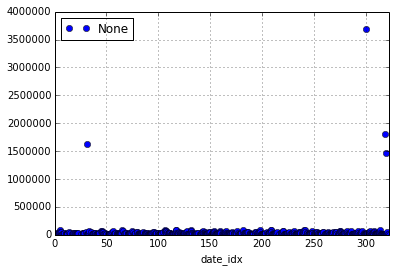

In [42]:
df4.plot(x='date_idx', y='amt', style='o')

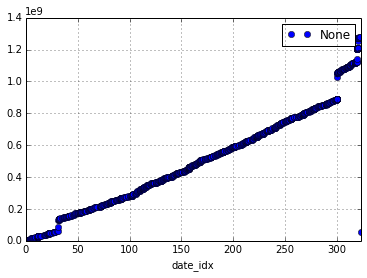

In [43]:
df4.plot(x='date_idx', y='cum_amt', style='o')

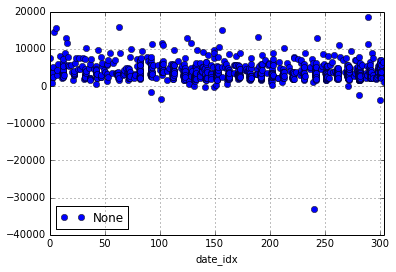

In [52]:
df4.plot(x='date_idx', y='amt', style='o')

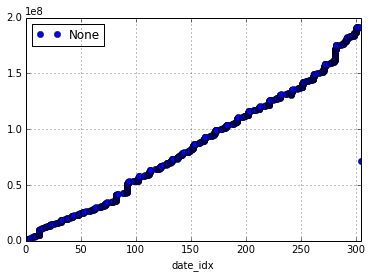

In [53]:
df4.plot(x='date_idx', y='cum_amt', style='o')